#  Les bases de python

Les basses de python sont exposées ici de façon sommaires. Le but est de passer le plus rapidement possibles aux programmes à vocation mathématiques; programmes que l'on veut le plus simple possible. Pour cela, vous commencerez toujours par observer du code, et quand ce sera à votre tour de coder, immitez au maximum ce que vous avez lu (en évitant cependant les copié-collé). 

Quand vous serez des vieux routier de la programmation, vous pourrez créer votre propre style (Ouaaa!).

## Blocs de code via l'indentation

Les blocs de codes sont définis par l'intentation. Les programmes sont ainsi très épurés. L'indentation se fait le plus souvent automatiquement lors des retours chariots, et sinon:

* Pour indenter un bloc complet, sélectionner-le et appuyez sur la touche tabulation.  
* Pour dé-sindenter :   shift+tabulation.

In [9]:
for i in [3,4,5]:
    print("i=",i)
    for j in [1,2]:
        print("     j=",j) 
        print("     i**j=",i**j) # l'opérateur ** c'est la puissance

i= 3
     j= 1
     i**j= 3
     j= 2
     i**j= 9
i= 4
     j= 1
     i**j= 4
     j= 2
     i**j= 16
i= 5
     j= 1
     i**j= 5
     j= 2
     i**j= 25


## Fonctions

* On utilise sans arrêt des fonctions crées par d'autres. Par exemple: `print("toto")`. 
* On crée parfois nos propres fonctions: quand cela clarifie la présentation des programmes, ou quand cela évite de dupliquer du code (c'est très mal!). 

### Définition et appel d'une fonction

In [10]:
def toto_add(a, b):
    return a+b

""" appel de la fonction précédemment définie:"""
res=toto_add(3, 4)
print(res)

7


### Arguments facultatifs

On peut ajouter des arguments avec des valeurs prédéfinies.

In [11]:
def toto_do_computations(a,b,c=1,d=1):
    return ((a+b)*c)**d

print(toto_do_computations(3,4))
"""conseille : toujours préciser le nom des arguments facultatifs """
print(toto_do_computations(3,4,c=2))
print(toto_do_computations(3,4,d=2))
print(toto_do_computations(3,4,c=2,d=2))



7
14
49
196


### Conseil sur les arguments de fonctions

Pour vos propres fonctions, je vous conseille de ne pas du tout utiliser d'argument facultatif; ce qui va bien avec notre devise "programmer le plus simplement possible". 

Mais vous allez devoir utiliser des fonctions crées par d'autres qui ont des arguments facultatifs. Par exemple, considérons une fonction de scipy qui généres des v.a gaussiennes:

In [41]:
import scipy.stats as stats
""" 'loc':espérance, scale:'ecart type', 'size': nombre de v.a générées"""
X=stats.norm.rvs(loc=-1,scale=3,size=3)
print(X)

[ 1.83439849 -0.97655303 -3.99448812]


Dans la fonction précédente, tous les arguments sont facultatifs. Les valeurs par défaut sont logiquement `loc=0,scale=1,size=1`. On peut écrire par exemple 

    simus=stat.norm.rvs(size=1000)

pour

     simus=stat.norm.rvs(loc=0,scale=1,size=1000)


Mais attention : si on ne précise pas le nom des arguments, ils sont pris dans l'ordre `1:loc 2:scale 3:size`
Par exemple: si, pour tirer 1000 gaussiennes, j'écris

     simus=stat.norm.rvs(1000)

mon programme bug car cela correspond à 

    simus=stat.norm.rvs(loc=1000)

Je vous conseille d'écrire quasi tout le temps le nom des arguments pour éviter ce genre de confusion ; sauf quand il s'agit d'un argument obligatoire évident comme dans `plt.plot(x,y)`.  

### Lambda expression
C'est une façon courte d'écrire les fonctions sans leur donner de nom. On parle de fonction anomyme. On les rencontre fréquement comme argument d'autre fonction. 

In [51]:
"une fonction qui prend comme argument une fonction"
def evaluate_a_function_on_integers(func,borne):
    res=[]
    for  i in range(borne):
        res.append(func(i))
    return res

# lambda x:x**2  signifie   x->x**2
evaluate_a_function_on_integers(lambda x:x**2,10)    

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [52]:
"""sans utiliser de fonction anonyme:"""
def square(x): 
    return x**2

evaluate_a_function_on_integers(square,10)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

## Listes, tuple, chaînes de caractères

Notez bien que les indices commencent à 0! 

### Liste: `[...]`

* Elles contiennent des éléments de n'importe quel type. 
* Leur taille peut varier en cours d'utilisation.

In [13]:
list0= [1, 2, 3, "quatre", 5]
print("la liste complète", list0)
print("le premier élément (numéro 0)", list0[0])
print("le dernier élément (numéro longueur-1)", list0[len(list0) - 1])
print("ou bien", list0[-1])

""" On lui rajoute un élément à la fin """
list0.append("six")
print(list0)

la liste complète [1, 2, 3, 'quatre', 5]
le premier élément (numéro 0) 1
le dernier élément (numéro longueur-1) 5
ou bien 5
[1, 2, 3, 'quatre', 5, 'six']


### Tuple: `(...)`

* Ils contiennent des éléments de n'importe quel type
* Leur taille ne peut pas varier
* On ne peut pas les modifier (ils sont "immutables")

In [14]:
a=(1,2,"trois")
""" les lignes suivante produisent des messages erreurs. Lisez ces messages."""
print(a)
#a[0]=2
#a.append("quatre")

(1, 2, 'trois')


Les tuples sont pratiques quand on veut qu'une fonction renvoie plusieurs éléments.

In [15]:
def beurreEtArgentDuBeure(nbPlaquette:float):
    poids=nbPlaquette*250
    prix=poids*2.5
    return (poids,prix)
    
(po,pr)=beurreEtArgentDuBeure(12)
print("poids:",po)
print("prix:",pr)

poids: 3000
prix: 7500.0


Remarque, les parenthèses autour des `tuples` sont souvent facultatives. Ci-dessus on aurait pu écrire: `return poids,prix` et: `po,pr=beurreEtArgentDuBeure(12)`

### Chaîne de caractère: `"..."` ou `'...'`

In [16]:
a="toto"
print(a)
""" on peut mettre des doubles guillement dans les simples """
b='toto dit "bonjour"'
print(b)
""" on peut ajouter des retours chariots et des tabulations"""
c='\t 1 \n\t 2'
print(c)
""" chaîne sur plusieurs lignes. Je les utilise aussi pour les commentaires."""
d="""
$$$_____$$$$$$$$$$$$$$$_$$$_______$$$_$$$$$$$$$$
$$$____$$$____$$$____$$$_$$$_____$$$__$$$_______
$$$____$$$___________$$$_$$$_____$$$__$$$_______
$$$_____$$$_________$$$___$$$___$$$___$$$$$$$$__
$$$______$$$_______$$$_____$$$_$$$____$$$_______
$$$_______$$$_____$$$______$$$_$$$____$$$_______
$$$$$$$$$___$$$_$$$_________$$$$$_____$$$$$$$$$$
"""
#print(d)

toto
toto dit "bonjour"
	 1 
	 2


### Itérables (à lire rapidement)

On utilise très fréquement la fonction `range()`. 

* `range(10)` c'est les entier de 0 à 9.
* `range(1,10)` c'est les entiers de 1 à 9.

Mais `range()` ne renvoie pas vraiment liste, mais un `iterable` c.à.d une liste potentielle, qui devient vraiment liste quand on l'itère dans une boucle: 

In [35]:
for i in range(4000000000000):
    j=10**i
    print(j)
    if j>10000: break #j'arrète, c'est trop gros 

1
10
100
1000
10000
100000


*** A vous:***  $(1\heartsuit)$ Que se serait-il passé si dans le programme précédent si `range()` renvoyé une liste?  

Pour comprendre l'intérêt des itérables: imaginez un programme de deeplearning qui doit s'entrainer en regardant des centaines de milliers d'images qu'il télécharge depuis le net. La strucutre principale du programme est:

        for img in allImg(): 
            train_with(img)

Si jamais `getAllImg()` renvoyait une liste, il faudrait attendre que toutes les images soient chargée en mémoire avant de commencer.  

A notre niveau, on ne créera pas d'iterable.  Je vous en parle pour que vous ne soyez pas surpris si vous 'printer' un itérable:

In [16]:
print(range(10)) # rien d'intéressant
print(list(range(10))) #on convertit l'iterable en liste 
print(tuple(range(10)))# ou bien en tuple

range(0, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)


### Point commun

Les listes, les tuples, les chaines de caractère, les itérables (et les vecteurs numpy, cf plus loin) ont tous en commun de pouvoir être parcouru (=itérés). De nombreuses fonctions toute faites acceptent n'importe lesquels de ces types. Cette souplesse fait parti de la philosophie de python. 

Pour illustrer cela, écrivons nous-même une fonction qui accepte plein d'arguments différents:

In [38]:
def parcour(sequence):
    for i in range(len(sequence)):
        print("l'élément:",i," est ",sequence[i])

print("liste")
parcour([1,2])
print("tuple")
parcour((3,4))
print("string")
parcour("toto")
print("iterable")
parcour(range(3))
print("tableau numpy")
parcour(np.linspace(0,1,5))


liste
l'élément: 0  est  1
l'élément: 1  est  2
tuple
l'élément: 0  est  3
l'élément: 1  est  4
string
l'élément: 0  est  t
l'élément: 1  est  o
l'élément: 2  est  t
l'élément: 3  est  o
iterable
l'élément: 0  est  0
l'élément: 1  est  1
l'élément: 2  est  2
tableau numpy
l'élément: 0  est  0.0
l'élément: 1  est  0.25
l'élément: 2  est  0.5
l'élément: 3  est  0.75
l'élément: 4  est  1.0


### Slicing

Cela permet de sélectionner des bouts de liste/string/tuple

In [19]:
liste=[0,1,2,3,4,5,6]
print(liste[:3])
print(liste[3:])
print(liste[-2])

[0, 1, 2]
[3, 4, 5, 6]
5


***A vous:*** Refaites ceci avec le mot: "abcdef". 

### Multiplier, additionner = concatenner

In [20]:
print([1,2]*3)
print((1,2)+(3,4))
print("tot"+"o"*5)

[1, 2, 1, 2, 1, 2]
(1, 2, 3, 4)
totooooo


***A vous:*** Définissez $(1\heartsuit)$ la chaine de caracère: `l'homme dit: "envole toi!"`

### Trier

C'est une opération qu'on utilise très souvent. Apprenez la syntaxe une bonne une bonne fois pour toute. 

In [21]:
a=[5,2,6,8]
b=sorted(a)
print(a)
print(b)

[5, 2, 6, 8]
[2, 5, 6, 8]


In [22]:
"variante 'inplace', a utiliser uniquement quand les tableau sont très gros."
a=[5,2,6,8]
a.sort()
a

[2, 5, 6, 8]

In [23]:
a=[('a',2,100),('c',10,-20),('b',0,1000)]
print("défaut:\n",sorted(a))
print("selon index 1:\n",sorted(a,key=lambda pair:pair[1] ))
print("selon l'opposé de l'index 1:\n",sorted(a,key=lambda pair:-pair[1] ))
print("selon une fonction des index 1 et 2:\n",sorted(a,key=lambda pair:pair[1]+pair[2] ))

défaut:
 [('a', 2, 100), ('b', 0, 1000), ('c', 10, -20)]
selon index 1:
 [('b', 0, 1000), ('a', 2, 100), ('c', 10, -20)]
selon l'opposé de l'index 1:
 [('c', 10, -20), ('a', 2, 100), ('b', 0, 1000)]
selon une fonction des index 1 et 2:
 [('c', 10, -20), ('a', 2, 100), ('b', 0, 1000)]


***A vous:*** Voici une liste de mot: `["bonjour","les","gars","comment","vous","allez"]`.
 Triez $(2\heartsuit)$ ces mot dans l'ordre alphabétique de leur dernière lettre. 

## Graphiques

On y reviendra beaucoup plus en détail par la suite. 

In [39]:
"""voici un import à connaître par coeur, il permet de faire des graphiques. """
import matplotlib.pyplot as plt  

### Relier des points

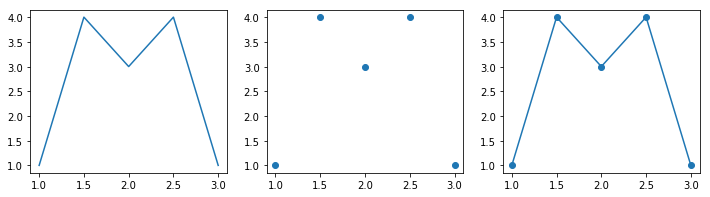

In [40]:
"""liste d'abscisses et liste d'ordonnées"""
x= [1,1.5,2,2.5,3]
y= [1,4,3,4,1]
""" La figure, et les axes """
fig,ax=plt.subplots(1,3)
""" on règle la taille de la figure """
fig.set_size_inches(12,3)
""" on divise la figure en 1-ligne, 3-colonnes, et on affiche le premier graphique """
ax[0].plot(x,y)
"""puis le second graphique"""
ax[1].plot(x,y,'o') #essayez aussi avec '.' ou '*' 
"""puis le troisième"""
ax[2].plot(x,y,'o-');

###  Graphe de fonction

En reliant finement des points, on peut tracer le graphe de fonctions lisses, avec un graphe... lisse! 

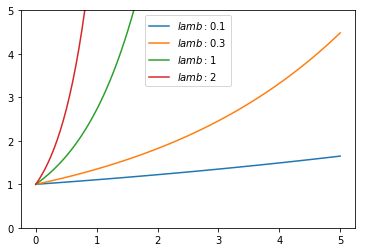

In [26]:
""" on anticipe sur les prochains TP. On va utiliser numpy, 
qui est une bibliothèque pour gérer les tableaux de nombres."""
import numpy as np

x=np.linspace(0,5,100) # 100 points répartis entre 0 et 5
fig,ax=plt.subplots()

"""attention 'lambda' est un mot clef réservé de python. du coup j'utilise 'lamb' """
for lamb in [0.1,0.3,1,2]:
    y=np.exp(lamb*x)
    ax.plot(x,y,label="$lamb:$"+str(lamb))

"""on limite les ordonnées. Pourquoi est-ce important dans ce graphique ?"""
ax.set_ylim([0,5])
ax.legend();

## Instructions conditionnelles

### instructions `if`, `elif`, `else`

In [27]:
a=6
if 4<a<=7:
    print("a est dans l'intervalle: ]4,7]")
elif 7<a<=10:
    print("a est dans l'intervalle: ]7,10]")
else :
    print("a est dans le complémentaire")

a est dans l'intervalle: ]4,7]


### boucle while

In [28]:
def algo(x):
    somme=0
    n=1
    while somme<x:
        somme+=1/n #c'est comme: sum=sum+ 1/n
        n+=1       #c'est comme: n=n+1
    return n

"""ne prenez pas ce paramètre 'x' trop grand -> cela devient très long. 
Au pire on peut toujours stopper un programme, avec le bouton carré stop"""
print(algo(10))

12368


***Exo:*** $(8\diamondsuit)$  Voici enfin un problème où vous allez devoir sortir votre cerveau de mathématicien: trouvez un encadrement (majorant, minorant) pour l'entier `algo(x)`. Ces (majorant, minorant) doivent s'exprimer avec des fonctions usuelles. Vérifiez votre encadrement avec un petit programme graphique. 

Aide: pour coder les fonctions usuelles:

In [30]:
import math

print(math.sin(3))
print(math.log(5))
print(math.exp(5))
print(5**2)

0.1411200080598672
1.6094379124341003
148.4131591025766
25


### l'instruction break

Elle permet de sortir d'une boucle. Très pratique, même si les puriste de la programmation la rejette. 

In [33]:
import numpy as np
while True:
    U=np.random.randint(0,7,size=1) #-> 0,1,2,3,4,5,6 with equal proba
    V=np.random.uniform(4,10,size=1)#-> [4,10] uniformly
    if U<V: break
    
print("U:",U,"V:",V)

U: [0] V: [9.29209989]


***A vous:*** Réécrivez $(3\heartsuit)$ ce programme sans le `break`. En moyenne, combien  d'itération met ce programme pour s'arréter? Calculez-le théoriquement $(2\heartsuit)$ puis vérifiez-le $(2\heartsuit)$ informatiquement. 

Remarquez que le programme avec break à deux avantages par rapport à celui sans break:

* la condition d'arrête est plus naturelle que sa négation (la fonction dans le while).
* Il n'est pas nécessaire d'initiliser `U` et `V`

## Dictionnaires

Les dictionnaires (= tables de hashage) sont des outils indispensables pour programmer.
Un dictionnaire est une collection contenant des VALEURS (=VALUES) qui sont indicées par des CLEFS (KEYS) uniques. Souvent les clefs sont des chaines de caractères.

Les dictionnaires sont très efficaces car le temps d'accès aux valeurs (via une clef) ne dépend pas de la taille du dictionnaire. Imaginez que chaque clef est transformée, via un hashage, en adresse mémoire qui pointe vers une valeur.

Il y a des dictionnaires partout :

*  votre système d'exploitation crée des dictionnaires avec comme clef tous les mots présents dans tous les documents de votre ordinateur, et comme valeur l'adresse des documents en questions. 
*  les moteurs de recherche créent des dictionnaires pour indexer tous les mots clefs dans toutes les langues.
*  les bases de données créent des indexes pour accéder plus rapidement aux données.

In [61]:
""" création d'un dico par la notation 'JSON' (utilisées par de nombreux langages)"""
dictionnaire = {'unEntier': 3, 'unStr': 'aba'}
"""création d'un liste par la notation JSON"""
maListe = [1, 2, 3, 4, 5]

"""création d'un dico élément par élément """
dico = {}
dico['unEntier'] = 3
dico['unStr'] = 'aba'
dico['unDico'] = dictionnaire
dico['uneListe'] = maListe

dico

{'unEntier': 3,
 'unStr': 'aba',
 'unDico': {'unEntier': 3, 'unStr': 'aba'},
 'uneListe': [1, 2, 3, 4, 5]}

In [62]:
""" il y a deux façons d'accéder aux valeurs : """
print(dico['unEntier'])  # quand on est sûr que la clef est présente. 
print(dico.get('toto'))  # quand on n'est pas sûr. Cela renvoie None quand la clef n'est pas présente

3
None


In [56]:
"""  Chaque clef dans un dictionnaire est unique.
Les dictionnaires peuvent être utilisés pour représenter des listes sans répétition:"""

uneListe = [1, 2, 1, 4, 1, 4, 1, 1, 1, 1]
laListeSansRepetition = {}
for i in uneListe:
    laListeSansRepetition[i] = True
print(laListeSansRepetition)
print("0 est dans notre ensemble ?:", laListeSansRepetition.get(0))

{1: True, 2: True, 4: True}
0 est dans notre ensemble ?: None


In [29]:
""" En fait, un dico avec que des "True" comme valeur est l'équivalent d'un ensemble (=set).  """
ensemble={1, 2, 1, 4, 1, 4, 1, 1, 1, 1} 
# c'est comme {1:True, 2:True, 1:True, 4:True, 1:True, 4:True, 1:True, 1:True, 1:True, 1:True}

print(ensemble)
ensemble.add(3)
ensemble.add(1)
print(ensemble)

{1, 2, 4}
{1, 2, 3, 4}


In [58]:
"""les dictionnaires sont souvent utilisés pour compter des occurences"""
unePhrase = "bonjour bonjour toi toi toi comment va va"
lesMots = unePhrase.split(sep=" ")
print(lesMots)
dico = {}
for mot in lesMots:
    if dico.get(mot) is None:
        dico[mot] = 1
    else:
        dico[mot] += 1
        
dico

['bonjour', 'bonjour', 'toi', 'toi', 'toi', 'comment', 'va', 'va']


{'bonjour': 2, 'toi': 3, 'comment': 1, 'va': 2}

In [60]:
"""une astuce pour aller plus vite (éventuellement vous pouvez l'ignorer)"""
dico2 = {}
for mot in lesMots:
    """dico.get(key,0) renvoît 0 (au lieu de None) quand la clef n'est pas présente"""
    dico2[mot]=dico.get(mot,0)+1
dico2

{'bonjour': 5, 'toi': 7, 'comment': 3, 'va': 5}

In [32]:
"""on voit que l'on peut indicer les dicos avec n'importe quoi comme clefs,
     et l'on voit comment on inverse les clefs et valeurs dans un dico"""
a=7
b=(9,8)
dico={a:5,"toto":7,5:"bou",b:7,7:(5,5)}
print(dico)
print(list(dico.keys()))
print(list(dico.values()))

"inversons un dico"
dicoInv={}
for key,val in dico.items():
    print(key,val)
    dicoInv[val]=key

print(dicoInv)

"la même chose en une ligne"
dicoInv2={ val:key for key,val in dico.items() }
print(dicoInv2)

{7: (5, 5), 'toto': 7, 5: 'bou', (9, 8): 7}
[7, 'toto', 5, (9, 8)]
[(5, 5), 7, 'bou', 7]
7 (5, 5)
toto 7
5 bou
(9, 8) 7
{(5, 5): 7, 7: (9, 8), 'bou': 5}
{(5, 5): 7, 7: (9, 8), 'bou': 5}


Mais peut-on vraiment utiliser n'importe quoi comme clef  ? Dans le programme ci-dessus, essayer de remplacer `b=(9,8)` par  `b=[9,8]` pour voir. 

***Exo:*** $(4\heartsuit)$ Le but est de créer une fonction qui calcule *rapidement* les éléments communs à deux listes. Par exemple avec comme entrée:
    
        liste1=[1,3,5,7]
        liste2=[8,6,5,3,2]
        
cette fonction renverra `[3,5]` ou `[5,3]`.  

Naivement, on effectuerait une double boucle:
```
inter=[]
for i in liste1:
    for j in liste2:
        if i==j: inter.append(j)
```

Mais la bonne technique  est de transformer la première listes en dico/ensemble puis de boucler sur la seconde liste. Cela va beaucoup plus vite.  

Remarque: il existe une procédure toute faite (ci-dessous), ne l'utilisez pas! 

In [34]:
liste1=[1,3,5,7]
liste2=[8,6,5,3,2]

ensemble1=set(liste1)
ensemble2=set(liste2)
inter=ensemble1.intersection(ensemble2)
inter

{3, 5}